# Linear Regression (~ 120 min)

![img](https://github.com/albarqounilab/EEDA-Autumn-School/raw/main/images/boston.jpeg)


**Background:**

Predicting housing prices holds significant importance for various stakeholders in the real estate market. Homeowners can leverage this information to make informed decisions about selling, determining listing prices, and deciding on property investments. For potential buyers, understanding housing prices aids in making informed choices about suitable properties, crafting reasonable offers, and assessing affordability. Real estate professionals rely on accurate price predictions to assist clients in buying or selling homes and making strategic investment decisions. Machine learning, with its ability to provide precise and reliable estimates, emerges as a valuable tool for enhancing housing price predictions compared to traditional methods.

**Dataset:**
The [Boston Housing Dataset] (https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) is a publicly available dataset containing 506 records with 14 attributes. These attributes include key characteristics such as per capita crime rate, residential zoning ratio, non-retail business square footage, proximity to the Charles River, nitrogen oxide concentration, average number of rooms per dwelling, age of units, distance to employment centers, access to radial highways, property tax rates, pupil-teacher ratios, racial proportions, low-income population, and, significantly, the median value of owner-occupied homes in $1000's (MEDV).

**Features:**

1. CRIM - Per capita crime rate by town
2. ZN - Proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - Proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - Nitric oxides concentration (parts per 10 million)
6. RM - Average number of rooms per dwelling
7. AGE - Proportion of owner-occupied units built before 1940
8. DIS - Weighted distances to five Boston employment centers
9. RAD - Index of accessibility to radial highways
10. TAX - Full-value property-tax rate per 10,000 USD
11. PTRATIO - Pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - Percentage lower status of the population
14. MEDV - Median value of owner-occupied homes in $1000's

**Task:**
Your task is to develop a predictive model to estimate the median value of owner-occupied homes in $1000's (MEDV) based on the provided dataset. Leveraging machine learning techniques, your goal is to create an accurate and reliable model that enhances predictions in comparison to traditional approaches. This exercise will enable you to apply regression analysis and explore the relationships between various features and the target variable (MEDV).

## Importing Libraries (10 min)
First we have to import some libraries:

*It is a good practice to import the libraries at the very beginning, however, you can import libraries and call functions wherever you need them!*

In [ ]:
import pandas as pd # data manipulation and analysis
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

ToDo (10 min):

*   What is each library helpful for? (You can use Google to familiarise yourself with the libraries)
*   Which of the lines above imports a package? Which imports a function?



##  Data Loading and Initial Exploration (8 min)

**Objective:**
This exercise focuses on loading a dataset, gaining familiarity with its structure using `pd.head()`, and performing a simple data cleaning task by removing a redundant index column.

**Instructions:**

1. **Load the Dataset:**
   - Use `pd.read_csv()` to read the dataset provided under the file path "sample_data/Boston.csv."

2. **Familiarize Yourself:**
   - Utilize the pandas function `head()` to display the first 5 records of the dataset.
   - Analyze the columns and their potential meanings.

3. **Remove Redundant Index Column:**
   - Identify the redundant index column, "Unnamed: 0."
   - Use the Pandas `drop()` function to remove this column.

**Analysis:**
Examine the output to confirm the successful removal of the "Unnamed: 0" column and ensure that the dataset is ready for further exploration. Understanding the columns is essential for subsequent analysis and modeling tasks.






In [ ]:
# Download the datset from github
!curl -O -L https://github.com/albarqounilab/EEDA-Autumn-School/raw/main/1.%20Linear_regression/Boston.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 37658  100 37658    0     0  63445      0 --:--:-- --:--:-- --:--:-- 63445


In [ ]:
# 1. Read the dataset
dataset = pd.read_csv('Boston.csv', delimiter=r",")

# 2. Print the first 5 records of the dataset
dataset.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# 3. Clean the dataset
col_names = dataset.columns.to_list()
print(col_names)
dataset = dataset.drop(columns=["Unnamed: 0"])
col_names = dataset.columns.to_list()
print(col_names)
dataset.head()

['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']
['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Data Exploration (20 min)

**Objective:**
In this exercise, we aim to perform exploratory data analysis by visualizing the correlations between the features using scatter plots and histograms. Familiarity with these types of plots is crucial for gaining insights into the dataset.

**Instructions:**

1. **Scatter Plots vs. Histograms:**
   - Briefly explain the differences between scatter plots and histograms.
   - Utilize the `matplotlib` library to create these plots.

2. **Correlation Visualization:**
   - Considering that there are 14 features, we need to generate a total of 196 plots to visualize the correlations between each feature.
   - Complete the missing parts in the code snippet provided below.
   - Use `axs[COLUMN_INDEX, ROW_INDEX]` to select subplots efficiently.

**Note:** The correlation plots will aid in identifying relationships between different features, guiding us in the selection of relevant features for further analysis.


**Analysis:**
Examine the generated plots to identify potential correlations and patterns between different features. This step is crucial for feature selection and gaining a preliminary understanding of the dataset's structure.


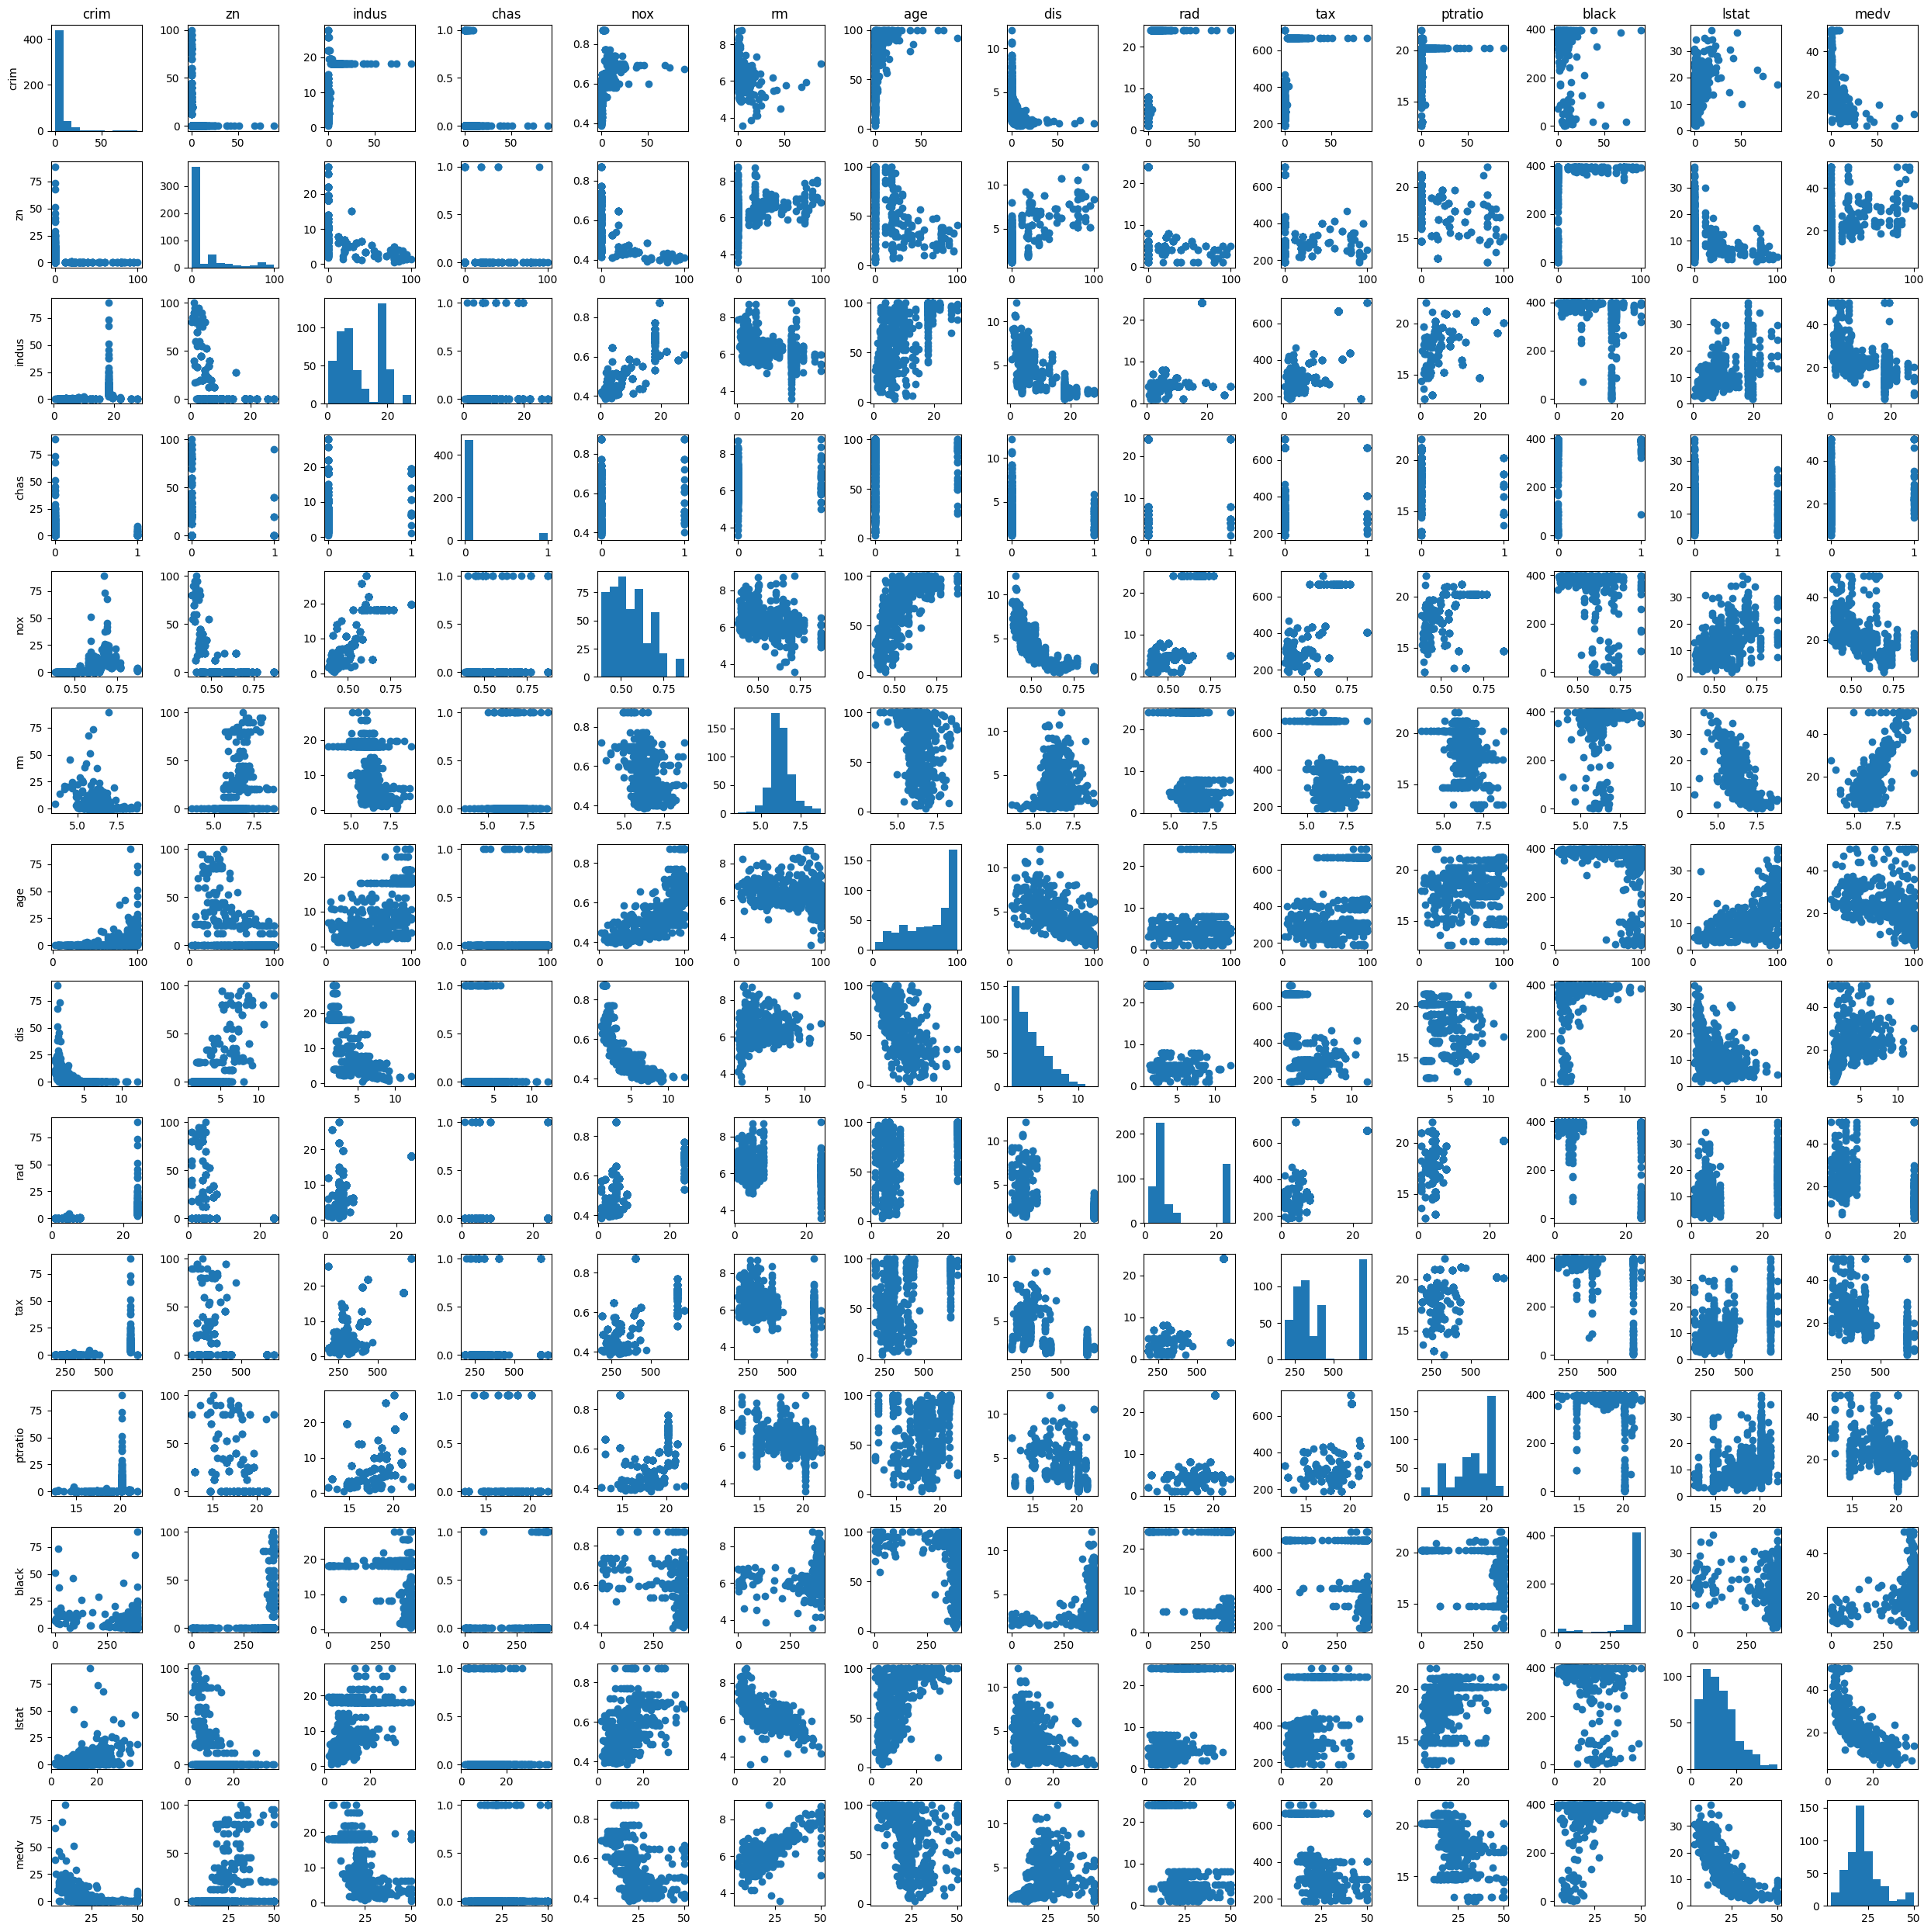

In [ ]:
# making a super plot with 14 by 14 subplot
fig, axs = plt.subplots(len(col_names), len(col_names), figsize=(25, 25))

# going throught the 14 by 14 subplots
for i in range(len(col_names)):
  for j in range(len(col_names)):
    # plot histogram if idential
    if i == j:
      axs[i,j].hist(dataset[col_names[i]])
    # plot the corelation if non-identical
    else:
      axs[i,j].scatter(dataset[col_names[i]], dataset[col_names[j]])
    axs[0,j].set_title(col_names[j])
  axs[i,0].set(ylabel=col_names[i])

plt.tight_layout()
plt.show()

### Your observations:
*Make some notes on what you can observe in the plot. E.g. positive-, negative correlation, value ranges, outliers. Have a look at the variables explanation above as well. Can you explain some of your observations?*


## Linear Regression Exploration (Analytical solution) (6 min)

**Objective:**
After becoming familiar with the data set, the goal is to delve into the basics of linear regression through an analytical solution. For simplicity, we will focus on using a single independent variable to predict a target variable, allowing us to visualize the relationships in 2D space. It's important to note that linear regression assumes a linear relationship between input and output.

**Instructions:**

1. **Select variables:**
   - Reflect on your observations of the data set.
   - Select two variables that you believe have a linear relationship. These variables will be used as the independent and target variables in our linear regression exploration.

2. **Variable Selection:**.
   - Enter the names of the selected independent and target variables in the cell provided below.
   - This selection will guide our subsequent analysis and allow us to more closely examine the potential linear relationship.

**Note:** Linear regression assumes that the relationship between variables is linear. Therefore, the variables selected should be those for which a linear relationship is expected.

```python
# Fill in the chosen variable names
independent_variable (predictor) = "Your_Independent_Variable"
target_variable (target) = "Your_Target_Variable"
```

**Analysis:**
Continue with a visual exploration and analytical solution of the linear regression parameters for the selected variables. This exercise is designed to increase your understanding of the basic principles of linear regression and lay the foundation for more complex analyses in future modules.

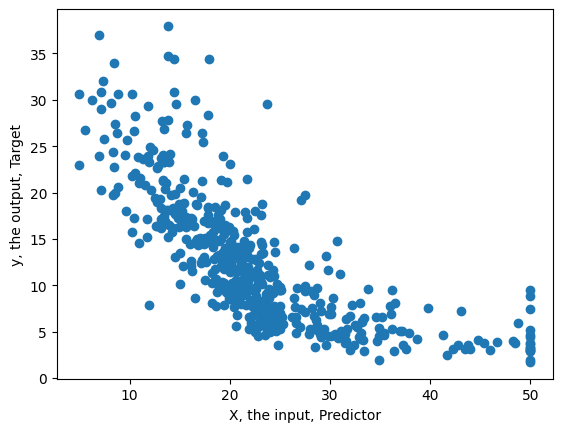

In [ ]:
predictor = 'medv' #TODO: fill in a column name
target = 'lstat' #TODO: fill in a column name

X = np.array(dataset[predictor].tolist()).reshape(-1, 1)
y = np.array(dataset[target].tolist()).reshape(-1, 1)

plt.scatter(X, y)
plt.xlabel("X, the input, Predictor")
plt.ylabel("y, the output, Target")
plt.show()

**Implementing the Analytical Solution for Linear Regression**: In this task, you are required to implement the analytical solution for fitting a line through a dataset. The problem can be expressed as a system of equations:

$$y_1 = b + w \cdot x_1$$
$$\vdots$$
$$y_n = b + w \cdot x_n$$

Your goal is to find the optimal values for the weight $w$ and bias $b$ that best fit the given dataset. A line is defined by the equation $y = b + wx$, where $w$ is the weight or slope of the line, and $b$ is the bias term, representing the point where the line intersects the $y$-axis (when $x = 0$). A positive value for $m$ indicates an upward slope as $x$ increases, while a negative value results in a downward slope.

**Instructions:**

1. **Fill in Weight and Bias:**
   - In the code cell below, you'll find initial values for the weight $w=w_{\text{initial}}$ and bias $b=b_{\text{initial}}$.
   - Your task is to modify these values to find the optimal parameters that best fit the dataset.

2. **Visualization:**
   - The code includes a scatter plot of the dataset and a line based on the initial weight and bias.
   - Adjust the weight $w=w_{\text{initial}}$ and bias $b=b_{\text{initial}}$ to observe how the line changes in an attempt to fit the dataset better.

3. **Experimentation:**
   - Play around with different values for $w=w_{\text{rand}}$ and $b=b_{\text{rand}}$.
   - Use the formulas for the analytical solutions to find the weight $w=w_{\text{analy}}$ and $b=b_{\text{analy}}$ and implement them
   - Observe how the line changes direction and position relative to the dataset.
   - Understand the impact of positive and negative values for the weight.


**Analysis:**
Experiment with different values for weight and bias to observe how the line adjusts to the dataset. This task simulates the manual exploration of parameters, which is a fundamental step in understanding the principles of linear regression. Remember that in practical scenarios, machine learning algorithms are employed to automate the process of finding optimal parameters.

[35, -1.0]


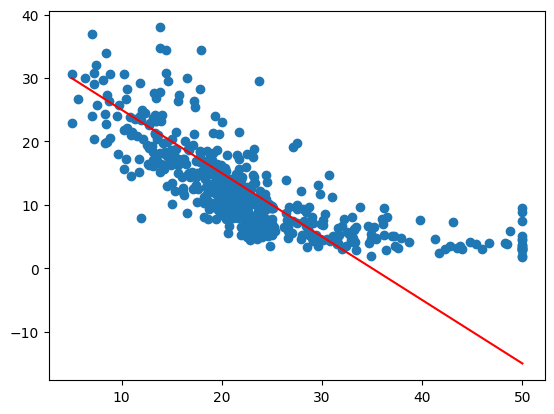

In [ ]:
# Have a try at guessing the best line
weight = -1.0
bias = 35

# Analytical solution
n,m = X.shape
X0 = np.ones((n,1)) # adding one more column for bias
Xnew = np.hstack((X0,X))
Xp = np.linalg.pinv(Xnew)
#[bias, weight]=np.dot(Xp,y)
print([bias, weight])


lineStart_hand = X.min() * weight + bias
lineEnd_hand = X.max() * weight + bias
plt.scatter(X, y)
plt.plot([X.min(), X.max()], [lineStart_hand, lineEnd_hand], color = 'r')
plt.show()

### Evaluation Metrics Overview (10 min)

To assess the quality of our linear regression model and how effectively it fits the data, we employ key evaluation metrics, notably $R^2$ (coefficient of determination) and Mean Squared Error (MSE).

**Coefficient of Determination ($R^2$):**
$R^2$ is calculated as $(1 - \frac{u}{v})$, where:
- $u$ is the residual sum of squares, given by ```((y_true - y_pred)** 2).sum()```.
- $v$ is the total sum of squares, calculated as ```((y_true - y_true.mean()) ** 2).sum()```.

A perfect model would yield an $R^2$ score of 1.0, while a score of 0.0 indicates that the model is equivalent to a constant predictor, and negative values are possible if the model performs worse than a simple constant prediction.

*Source: [scikit-learn Linear Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score)*

**Mean Squared Error (MSE):**
MSE is a widely used metric, representing the expected value of the squared error. It is defined as $\frac{1}{N} ∑_{i=0}^{N-1}(y_i - \hat{y}_i)^2$, where $\hat{y}$ represents the model predictions. A lower MSE indicates better performance, and achieving an MSE of 0 is the optimal outcome, signifying that predictions perfectly match the target values.

These evaluation metrics offer valuable insights into the accuracy and effectiveness of our linear regression model. While $R^2$ provides a measure of the proportion of the variance in the target variable that is predictable from the independent variables, MSE quantifies the average squared difference between predicted and actual values.

*Note: The choice of metrics depends on the specific goals and requirements of the modeling task.*

In [ ]:
def reg_score(X, y, weight, bias):
  u_f = lambda X, y: (y - (X * weight + bias))**2
  u = u_f(X, y).sum(axis=0)
  v = ((y - y.mean()) ** 2).sum(axis=0)
  r = 1 - (u/v)
  return r

def mse(X, y, weight, bias):
    mse = np.power((X * weight + bias)-y, 2)
    mse = mse.sum(axis=0)
    return mse/X.shape[0]


Let's see how your model performs:

In [ ]:
print("R^2: ", reg_score(X, y, weight, bias).item())

print("MSE: ", mse(X, y, weight, bias))

R^2:  0.24068624405401662
MSE:  [38.64449862]


**Exploring the Impact of Weight and Bias on Model Performance:**

Let's take a closer look at why the numbers matter in our modeling adventure. Our mission is to fine-tune our model's performance, and two key players in this game are the *weight* and *bias*. Think of them as our navigators through a landscape represented by the cost function.

The cost function/metric is like a bumpy terrain, and the *weight* and *bias* are our guides to finding the smoothest path, where our model performs at its best. In the upcoming plots, you'll see a visual representation of this journey. We're essentially testing different combinations of *weight* and *bias* to pinpoint the sweet spot, where our model is optimized for success. It's like finding the perfect balance to make our model predict outcomes as accurately as possible. So, let's dive into the visuals and witness how these simple adjustments can lead us to a better, more efficient model.

In [ ]:
def plot_contour(w_min, w_max, b_min, b_max, metric_function, title, resolution=100, cmap='coolwarm'):
  ws = np.linspace(w_min, w_max, resolution) #slope range
  bs = np.linspace(b_min, b_max, resolution) #intercept
  WS, BS = np.meshgrid(ws, bs)

  Z = metric_function(X, y, WS.flatten(), BS.flatten())

  fig, ax = plt.subplots()
  cs = ax.contourf(WS, BS, Z.reshape(WS.shape), cmap=cmap)
  ax.grid(c='k', ls='-', alpha=0.3)
  ax.set_title(title)
  ax.set_xlabel("Weight")
  ax.set_ylabel("Bias")
  plt.colorbar(cs)
  plt.show()

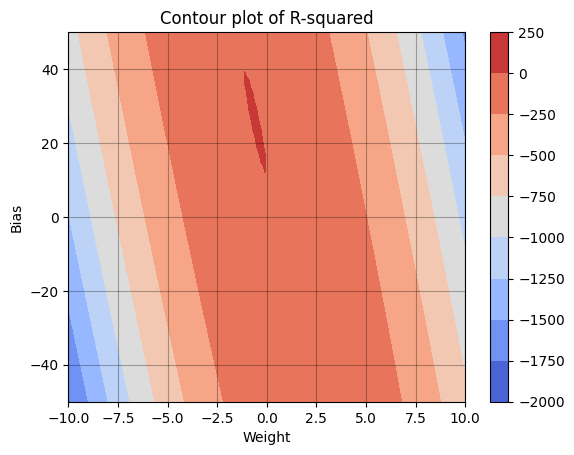

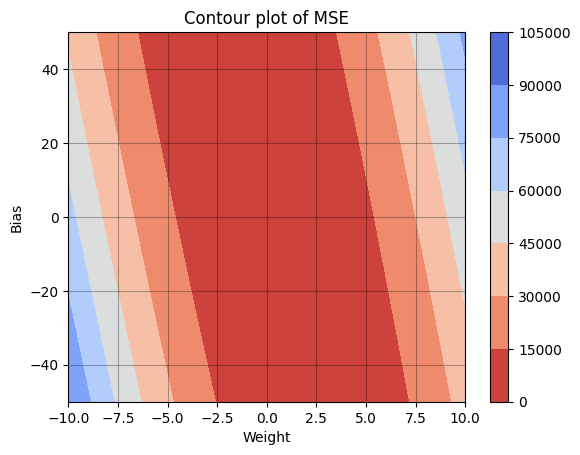

In [ ]:
plot_contour(-10, 10, -50, 50, reg_score, 'Contour plot of R-squared')
plot_contour(-10, 10, -50, 50, mse, 'Contour plot of MSE', cmap='coolwarm_r')

**Analysis:**
Examining the contour plots, it's evident that we're navigating the landscape of our cost function, seeking the optimal combination of weight and bias for our model. The plots provide a visual representation of our journey, showcasing the varying performance scores corresponding to different weight-bias configurations.

As you experiment with different weight and bias values, take note of how far you are from the optimum – the point where your model achieves the best possible performance. Iteratively try different combinations to see if you can enhance the fit and move closer to the optimal solution. Keep track of your attempts and their resulting scores in the cell below. This record will serve as a valuable log of your exploration, helping you understand the impact of different parameter choices on model performance.

| Weight | Bias |  R^2 | MSE |
|--------|------|------|-----|
|        |      |      |     |
|        |      |      |     |
|        |      |      |     |

## Linear Regression (Iterative solution) (2 min)

If you reach a point where further improvement seems challenging, consider leveraging the `LinearRegression` function from the `scikit-learn` library. This ready-made tool can automate the process, potentially providing a more efficient and optimized solution. For more details, refer to [scikit-learn Linear Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Let's transition to this phase and explore the benefits it offers in streamlining our linear regression modeling process.

In [ ]:
#TODO use linear regression function
reg = LinearRegression().fit( X, y)
# The coefficients
print(f"Weight: {reg.coef_.item()} ; Bias:{reg.intercept_.item()}")
print("with R^2 score: ", reg.score(X, y), " and MSE: ", mse(X, y, reg.coef_.item(), reg.intercept_.item()).item())


Weight: -0.572755820983477 ; Bias:25.558859226334413
with R^2 score:  0.5441462975864798  and MSE:  23.200208918044186


Let's see how the model performs:

In [ ]:
print(f"Weight: {reg.coef_.item()} ; Bias:{reg.intercept_.item()}")
print("with R^2 score: ", reg.score(X, y), " and MSE: ", mse(X, y, reg.coef_.item(), reg.intercept_.item()).item())


Weight: -0.572755820983477 ; Bias:25.558859226334413
with R^2 score:  0.5441462975864798  and MSE:  23.200208918044186


##Analytical vs. Iterative Solutions Comparison (14 min):

Let's gauge the effectiveness of both the analytical and iterative approaches. How does the score from your analytical solution stack up against using an iterative method? Take a moment to reflect on this numerical comparison.

Now, shift your focus to the visual representation below, showcasing the lines derived from the analytical and iterative solutions. Can you easily discern which line performs better in capturing the underlying patterns of the dataset? Consider the nuances in the plot and evaluate if one solution stands out as evidently superior to the other.

*Your answer goes here*

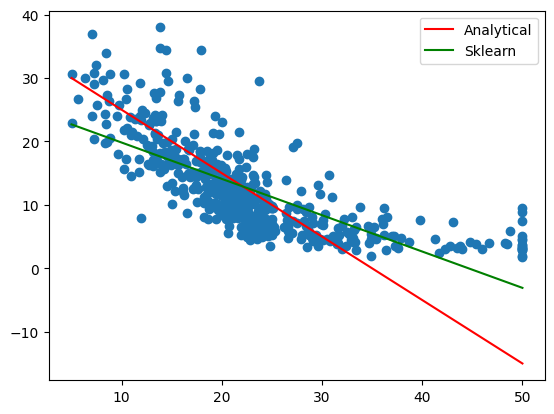

In [ ]:
lineStart = X.min() * reg.coef_[0] + reg.intercept_
lineEnd = X.max() * reg.coef_[0] + reg.intercept_

fig, ax = plt.subplots()
ax.scatter(X, y)
ax.plot([X.min(), X.max()], [lineStart_hand, lineEnd_hand], color = 'r', label='Analytical')
ax.plot([X.min(), X.max()], [lineStart, lineEnd], color = 'g', label='Sklearn')
ax.legend()
plt.show()

**Residual Analysis**

Now, let's take a closer look at the fitted line using a technique called residuals analysis. This method enables us to dissect the portion of the data that remains unexplained by our model. The residual for each data point represents the distance from that point to the regression line. Scrutinizing these residuals provides valuable insights into how well our model captures the nuances of the dataset and where it might fall short.

In an ideal scenario, where our model perfectly fits the data, all residuals would be zero. However, this rarely occurs. Instead, we anticipate the residuals to be randomly scattered around zero. If there's any discernible pattern in the residual plot, it signals that there's additional information in the data that our model isn't capturing.

Moreover, the residual plot serves as a tool to identify outliers in our data. Outliers, being far away from the center line, can be easily spotted through this analysis.

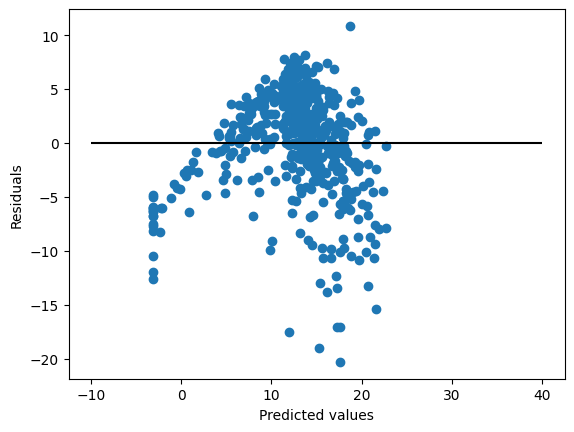

In [ ]:
pred = reg.predict(X)
#TODO: scatter plot of the predictions and residuals
plt.scatter(pred, pred - y)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.hlines(y=0, xmin=-10, xmax=40, color='black')
plt.show()

### Your observations:
*Make some notes on what you can observe in the plot.*

#Polynomial Regression Exploration (20 min)

**Objective**: In many real-world scenarios, assuming a linear dependency may not adequately capture the underlying complexities of the data. To illustrate this, examine the plot below and consider how you would describe the shape of the data.


*your answer goes here*

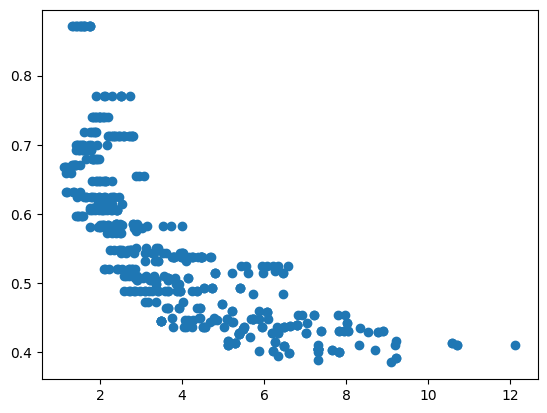

In [ ]:
X = np.array(dataset['dis'].tolist()).reshape(-1, 1)
y = np.array(dataset['nox'].tolist()).reshape(-1, 1)

plt.scatter(X, y)
plt.show()

1. **Linear Regression:**
   - Begin by fitting a linear regression model to the data as we did previously.
   - Evaluate the resulting $R^2$ and Mean Squared Error (MSE) scores to gauge the model's performance.

In [ ]:
# to work with the multi dimmensional data we have to redefine the mse function
def mse(X, y, weight, bias):
    y = y.reshape(-1)
    mse_val = np.sum(X * weight, axis=1)
    mse_val = mse_val + bias
    mse_val = np.power(mse_val-y, 2)
    mse_val = mse_val.sum(axis=0)

    return mse_val/X.shape[0]

In [ ]:
#...Your code goes here
# Fit the model
# print the weight, bias, r^2 and MSE score

reg = LinearRegression().fit( X, y)
print(f"Weight: {reg.coef_.item()} ; Bias:{reg.intercept_.item()}")
print("with R^2 score: ", reg.score(X, y), " and MSE: ", mse(X, y, reg.coef_.item(), reg.intercept_.item()).item())

Weight: -0.04233089656877705 ; Bias:0.715342618777651
with R^2 score:  0.5917149670934201  and MSE:  0.005471468100729794


2. **Polynomial Regression:**
   - Recognizing the limitations of linear assumptions, let's explore polynomial regression. Instead of adhering to a linear equation $y = X \cdot w + b$, we now consider a polynomial model $y = X \cdot w_1 + X^2 \cdot w_2 + \ldots + X^n \cdot w_n + b$.
   - Utilize the `PolynomialFeatures` function from Scikit-Learn to facilitate this transformation (check the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)).

3. **Degree 2 Polynomial:**
   - Begin by testing a polynomial of degree 2: $y = X \cdot w_1 + X^2 \cdot w_2 + b$.
   - Observe how the weight and bias terms differ compared to the linear model.
   - Evaluate the $R^2$ and MSE scores for the polynomial model.

In [ ]:
degree = 2
poly = PolynomialFeatures(degree)
T = poly.fit_transform(X)
T = T[:,1:] # remove the first column as this is always 1

reg = LinearRegression().fit( T, y)
print(f"Weights: {reg.coef_[0]} ; Bias:{reg.intercept_.item()}")
print("with R^2 score: ", reg.score(T, y), " and MSE: ", mse(T, y, np.tile(reg.coef_[0], (len(T), 1)), reg.intercept_.item()))

Weights: [-0.1116276   0.00713503] ; Bias:0.8439910707412352
with R^2 score:  0.6998562064647851  and MSE:  0.004022256657974815


**Analysis**: Reflect on the changes in the weight and bias terms, and how the scores compare between the linear and polynomial models. This exploration provides valuable insights into the adaptability of polynomial regression in capturing more intricate relationships within the data.

Try a few more degrees by editing the cell and see how the sores change. To keep track of your changes fill in the table below.

*your answer goes here*

|Degree | Weight Vector | Bias |  R^2 | MSE |
|-------|---------------|------|------|-----|
|       |               |      |      |     |
|       |               |      |      |     |
|       |               |      |      |     |

# Exploring Multivariate Regression (12 min)

As we've just seen, using just one piece of information doesn't always give us accurate predictions. Life is full of different factors that can affect outcomes. For simplicity's sake, we'll focus on just two factors for now. This way we can visualize it in 3D space, where we can see how two things work together.

Take a look at the plot below (you can zoom and pan). This time you need to choose two weights to understand how these factors affect our predictions. As before, try different combinations and see how the plot changes. While we're looking at two factors here, remember that in real life we may be dealing with more factors, and the same techniques we're learning now can be applied to solve more complex problems.

In [ ]:
input_columns = ['dis', 'lstat']
X = np.array(dataset[input_columns].values)
y = np.array(dataset['medv'].tolist()).reshape(-1, 1)

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=dataset[input_columns[0]], y=dataset[input_columns[1]], z=dataset['medv'], mode='markers', marker=dict(
        size=4,
        color='blue',
        opacity=0.8
    )))

fig.show()

- Play with the weights and bias (now represented as a matrix) to visualize the fit space. Notice how the scatter points align with this space.

In [ ]:
weights = [0.6, -1]
bias = 38

# create a meshgrid to plot the decision plane
xs = np.linspace(X[:,0].min(), X[:,0].max(), 100)
ys = np.linspace(X[:,1].min(), X[:,1].max(), 100)
xs, ys = np.meshgrid(xs, ys)

zs = xs * weights[0] + ys * weights[1] + bias

fig = go.Figure()
fig.add_surface(x=xs,y=ys,z=zs,showscale=False,showlegend=False, colorscale ='Reds')

fig.add_trace(go.Scatter3d(x=dataset[input_columns[0]], y=dataset[input_columns[1]], z=dataset['medv'], mode='markers', marker=dict(
        size=4,
        color='blue',
        opacity=0.8
    )))

fig.show()

In [ ]:
print("with R^2 score: ", reg_score(X, y, weights, bias), " and MSE: ", mse(X, y, weights, bias)) #delete

with R^2 score:  [-3.67987736  0.44883291]  and MSE:  69.27638783823714


- Next, use the Multivariate Regression ``LinearRegression`` function to see how well the fitted space matches the actual data. As before, use metrics such as $R^2$ and Mean Squared Error to evaluate the goodness of fit. Experiment and observe how adjusting the weights affects the performance of the model.

In [ ]:
reg = LinearRegression().fit( X, y)

# The coefficients
print(f"Weights: {reg.coef_[0]} ; Bias:{reg.intercept_}")
print("with R^2 score: ", reg.score(X, y), " and MSE: ", mse(X, y, reg.coef_, reg.intercept_.item()))

zs_model = xs * reg.coef_[0][0] + ys * reg.coef_[0][1] + reg.intercept_.item()

fig = go.Figure()
fig.add_surface(x=xs,y=ys,z=zs,showscale=False,showlegend=True, colorscale ='Reds', name='Analytical')
fig.add_surface(x=xs,y=ys,z=zs_model,showscale=False,showlegend=True, colorscale ='Greens', name= 'Model')

fig.add_trace(go.Scatter3d(x=dataset[input_columns[0]], y=dataset[input_columns[1]], z=dataset['medv'], mode='markers', marker=dict(
        size=4,
        color='blue',
        opacity=0.8
    ), name = 'Data'))

fig.show()

Weights: [-0.67683249 -1.04923978] ; Bias:[38.3775118]
with R^2 score:  0.5622284255429311  and MSE:  36.956482013451534


Compare the two planes and the scores. What do you observe?

*Your answer goes here*

# Your Regression Model (15 min)

Having gained valuable insights into the available data, it's time to focus on our **ultimate goal**: predicting the median value of owner-occupied homes. Use the correlation plot below to identify the most influential features for training a regression model. Feel free to explore additional techniques such as polynomial modeling or feature engineering to improve model performance. Embrace creativity and strive for optimal results as you move forward in your quest for accurate predictions.
After training your own model, apply the trained model to new data entries to predict housing prices and evaluate its real-world predictive ability.

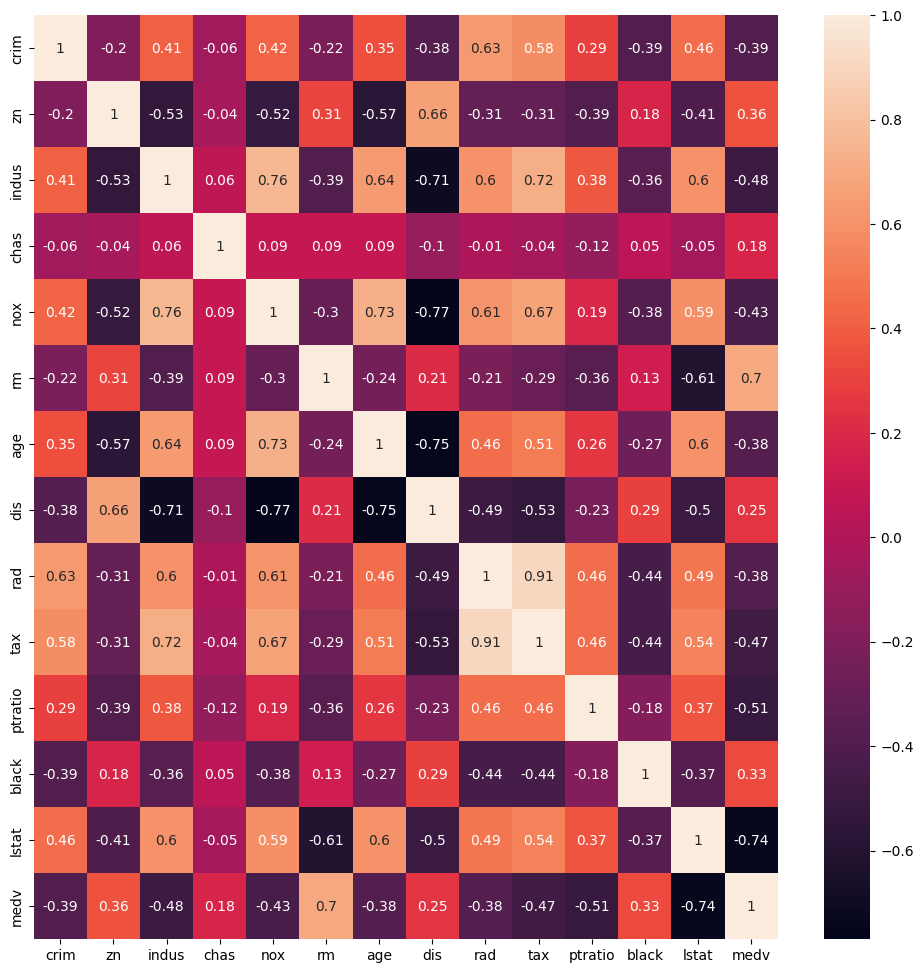

In [ ]:
import seaborn as sns
correlation_matrix = dataset.corr().round(2)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data=correlation_matrix, annot=True, ax=ax)
plt.tight_layout
plt.show()

In [ ]:
#TODO: train a regression model based on your selected features
input_columns = ['dis', 'lstat', 'rm']
X = np.array(dataset[input_columns].values)
y = np.array(dataset['medv'].tolist()).reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)

weights = model.coef_
bias = model.intercept_

In [ ]:
print("with R^2 score: ", reg_score(X, y, weights, bias), " and MSE: ", mse(X, y, weights, bias))

with R^2 score:  [-5.52689455 -9.36456828 -1.02897218]  and MSE:  29.81849460109547


In [ ]:
# Predict your housing prices
input = np.array([2.0,1.0,6.0]).reshape(1,-1)
pred = model.predict(input)
print(pred)

[[30.4027126]]
